## Visualization Analysis Report

In [39]:
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('./Modules')  # Replace 'folder_name' with the actual folder name
from load_data import load_data
TRAIN_PATH = "data/train.csv"

### Review of Existing Visualizations

Existing analysis covers essential visualizations, including:
* Distributions of passengers by features like sex, age, class, family size, etc., along with comparisons between training and testing sets
* Distributions and survival comparisons by various features
* Fare and age distributions across classes


These figures presents a through picture of survival patterns based on passengers demographics and ticket class, which are key features in survival prediction. However, there are indeed too many visualizations in our analysis, which can be redundant and overwhelming for our audience.

### Most Informative Visualizations

#### 1. Survival by Pclass and Sex

These two graphs below show strong disparities in the number of survivors across different passenger classes and sexes, and therefore justify the importance of class and sex as predictors.

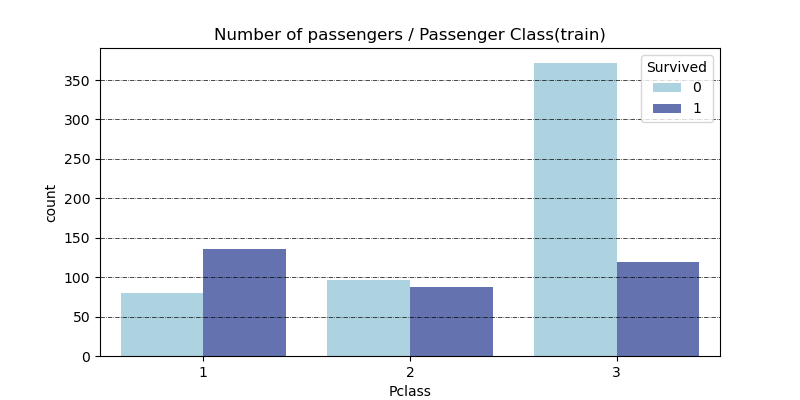

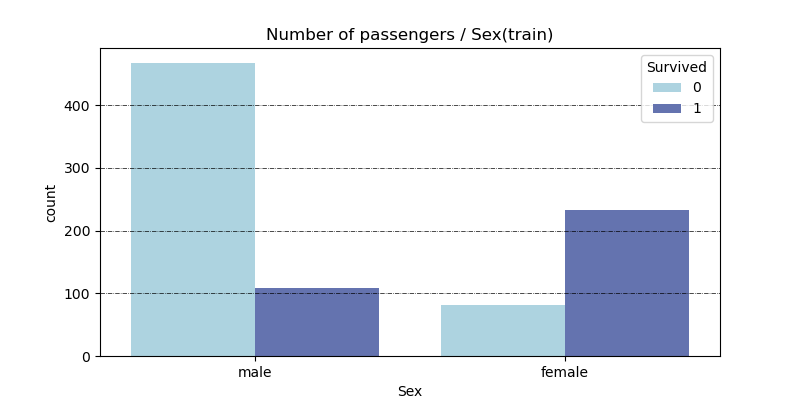

In [28]:
display(Image(filename='figures/count_by_Pclass_train.png'))
display(Image(filename='figures/count_by_Sex_train.png')) 

#### 2. Fare Distribution by Pclass

The fare distribution across passenger classes reveals wealth-related advantages in survival.

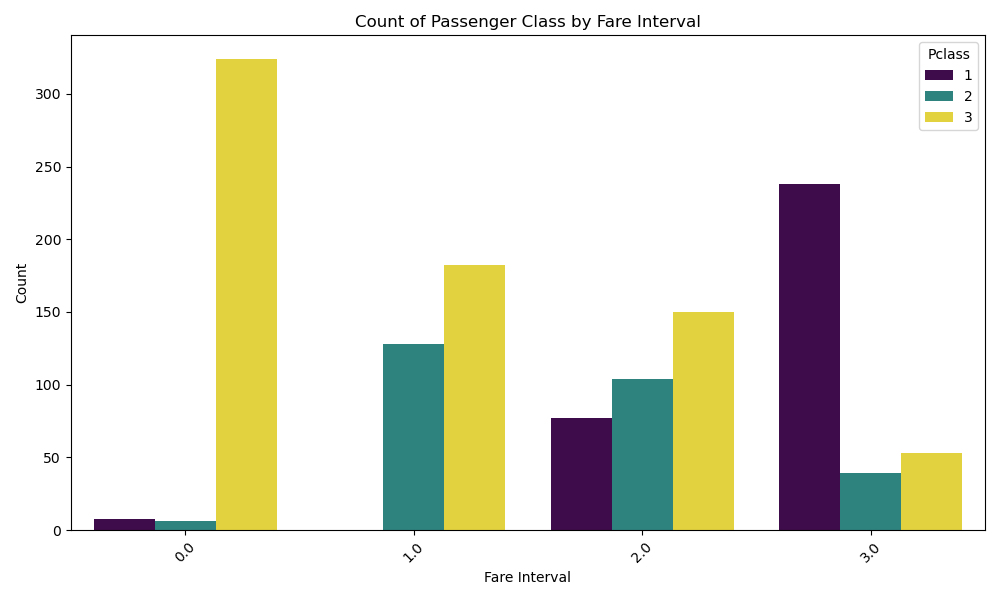

In [29]:
display(Image(filename='figures/Count pairs of Pclass grouped by Fare Interval.png'))

#### 3. Age Distribution by Survival

The age distribution by survival reveals a higher chance to survive for younger passengers.

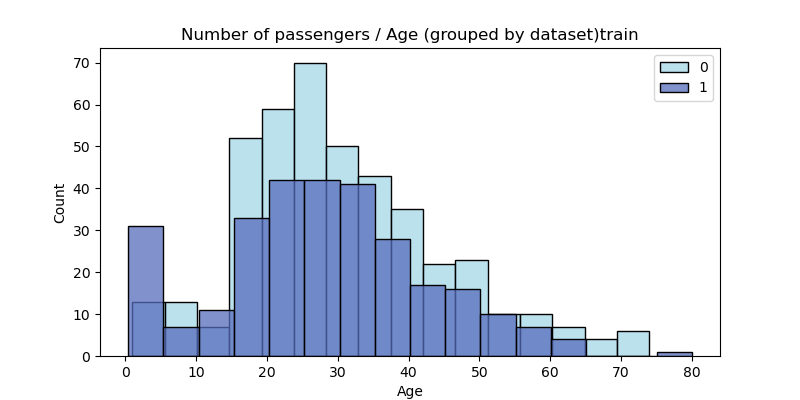

In [31]:
display(Image(filename='figures/dist_by_Age_train.png'))

### Additional Visualizations for Feature Selection

To further support feature selection, I would create an additional graph that compares differences in survival rates based on embarking port, passenger class, and sex.

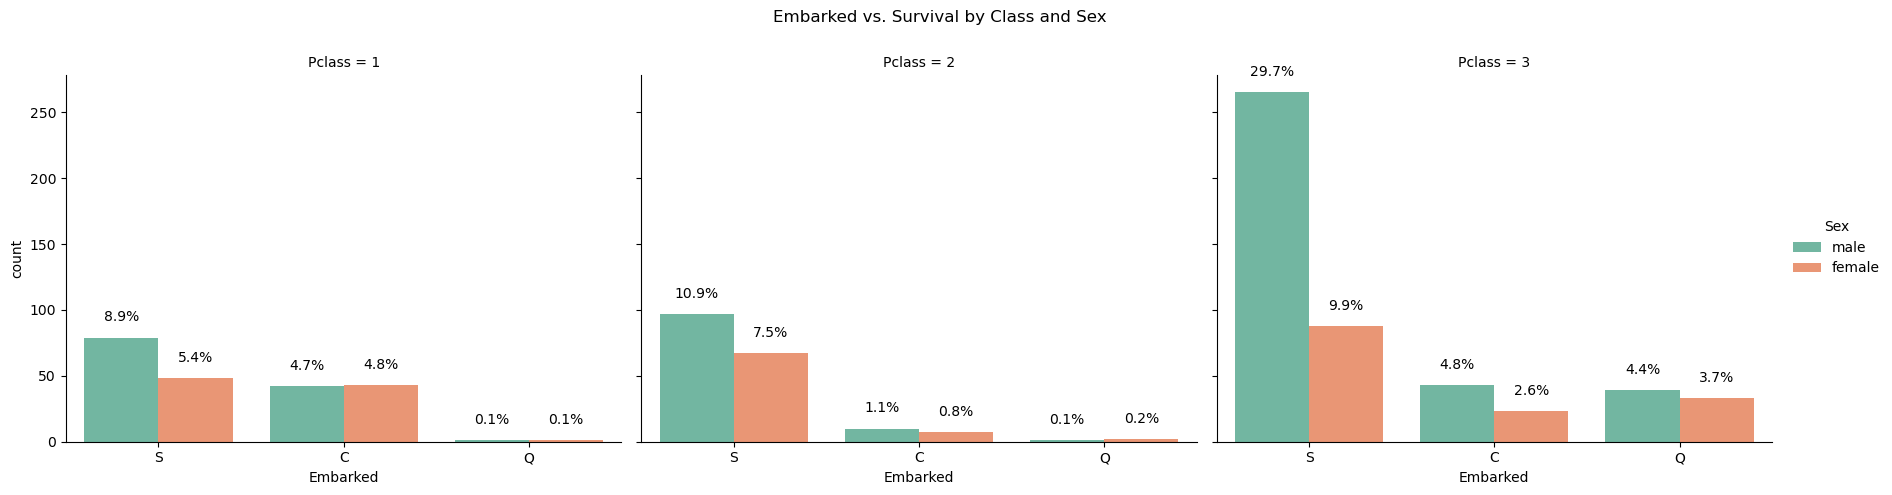

In [48]:
def plot_embarked_vs_survival_by_class_sex(df, filename='figures/embarked_vs_survival_by_Pclass_and_Sex.png'):
    """
    Plot the survival rate based on the embarking port, passenger class, and sex.
    """
    g = sns.catplot(x="Embarked", hue="Sex", col="Pclass", data=df, kind="count", 
                    height=5, aspect=1.2, palette="Set2")

    for ax in g.axes.flat:
        total = len(df) 
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  
                percentage = (height / total) * 100  
                ax.text(p.get_x() + p.get_width() / 2., height + 10, 
                        f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Embarked vs. Survival by Class and Sex')

    plt.savefig(filename)

    plt.show()

train_df = load_data(TRAIN_PATH)

plot_embarked_vs_survival_by_class_sex(train_df)

The histograms above indicate that passengers who embarked at port S have a higher suvivral rates than those who embarked at the other two ports. This may supports the potential importance of embarking port as a predictor in our feature selection since it seems to correlated with survival chances.